In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import gdown
from IPython.display import clear_output

id = '1WhaRBoJuKqi7msG4PQuCj2M6nw-9DSzc'
url = 'https://drive.google.com/uc?id={}'.format(id)
output = 'Classifier Data'

gdown.download(url, output)
clear_output()

In [3]:
data = pd.read_csv('Classifier Data', index_col=0)

data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


## Standardize variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_feat = scaler.fit_transform(data.drop('TARGET CLASS', axis=1))

In [6]:
type(scaled_feat)

numpy.ndarray

In [7]:
final_data = pd.DataFrame(scaled_feat, columns=data.columns[:-1])
final_data.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Training the model 

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_data, data['TARGET CLASS'], test_size=0.2, random_state=101)

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

## Predictions and Evaluations

In [10]:
y_predict = model.predict(X_test)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       106
           1       0.93      0.90      0.92        94

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200

[[100   6]
 [  9  85]]


## Choosing a K value 

In [12]:
error_rate = []

for i in range(1,101):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    error_rate.append(np.mean(y_test != y_predict))

Text(0, 0.5, 'Error Rate')

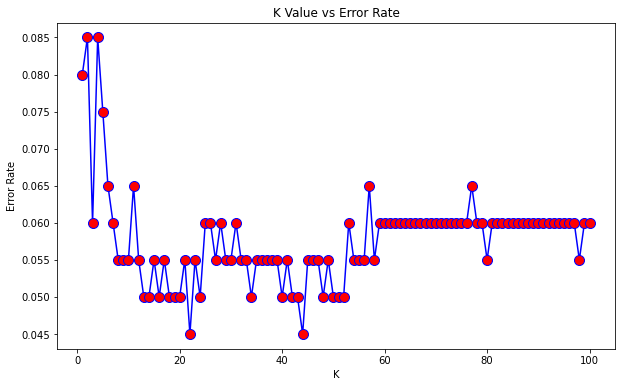

In [13]:
plt.figure(figsize=(10,6))

plt.plot(range(1, 101), error_rate, color='blue', linestyle='-', marker='o', markerfacecolor='red', markersize=10)
plt.title('K Value vs Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [14]:
print('WITH K = 22\n')
model = KNeighborsClassifier(n_neighbors=22)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

WITH K = 22

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       106
           1       0.96      0.95      0.95        94

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

[[102   4]
 [  5  89]]


## DONE